<a href="https://colab.research.google.com/github/ykitaguchi77/GAN/blob/master/ProjectedGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projected GAN**

Original: https://github.com/autonomousvision/projected_gan

Implementation: http://cedro3.com/ai/projected-gan/

Paper: http://www.cvlibs.net/publications/Sauer2021NEURIPS.pdf


In [1]:
# --- セットアップ ---

# Pytorch バージョン変更
! pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html

# githubからコードを取得
! git clone https://github.com/autonomousvision/projected_gan
! pip install timm dill
%cd projected_gan

# 学習済みパラメータのダウンロード
#! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/art_painting.pkl
#! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/church.pkl
#! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/cityscapes.pkl
#! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/clevr.pkl
! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/ffhq.pkl
#! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/flowers.pkl
#! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/landscape.pkl
#! wget https://s3.eu-central-1.amazonaws.com/avg-projects/projected_gan/models/pokemon.pkl


# 画像表示
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

def display_pic(folder):
    fig = plt.figure(figsize=(30, 60))
    files = os.listdir(folder)
    files.sort()
    for i, file in enumerate(files):
        img = Image.open(folder+'/'+file)    
        images = np.asarray(img)
        ax = fig.add_subplot(10, 5, i+1, xticks=[], yticks=[])
        image_plt = np.array(images)
        ax.imshow(image_plt)
        ax.set_xlabel(file, fontsize=25)               
    plt.show()
    plt.close()

# リセットフォルダ
import shutil

def reset_folder(path):
    if os.path.isdir(path):
      shutil.rmtree(path)
    os.makedirs(path,exist_ok=True)

# 動画再生
from IPython.display import display, HTML
from IPython.display import HTML

def display_mp4(path):
    print('prepere to play movie...')
    from base64 import b64encode
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML("""
    <video controls loop autoplay>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))

     |████████████▌                   | 834.1 MB 1.3 MB/s eta 0:17:06tcmalloc: large alloc 1147494400 bytes == 0x39866000 @  0x7f914f10d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████▉                | 1055.7 MB 1.2 MB/s eta 0:14:41tcmalloc: large alloc 1434370048 bytes == 0x7debc000 @  0x7f914f10d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████            | 1336.2 MB 1.2 MB/s eta 0:11:33tcmalloc: large alloc 1792966656 bytes == 0x2cee000 @  0x7f914f10d615 0x592b76 0x4df71e 0x59afff 0x515655 0x5

In [2]:
# サンプル画像生成
reset_folder('out')
! python gen_images.py --outdir=out\
                       --trunc=1.0\
                       --seeds=20-29 \
                       --network=ffhq.pkl

Loading networks from "ffhq.pkl"...
Generating image for seed 20 (0/10) ...
Generating image for seed 21 (1/10) ...
Generating image for seed 22 (2/10) ...
Generating image for seed 23 (3/10) ...
Generating image for seed 24 (4/10) ...
Generating image for seed 25 (5/10) ...
Generating image for seed 26 (6/10) ...
Generating image for seed 27 (7/10) ...
Generating image for seed 28 (8/10) ...
Generating image for seed 29 (9/10) ...


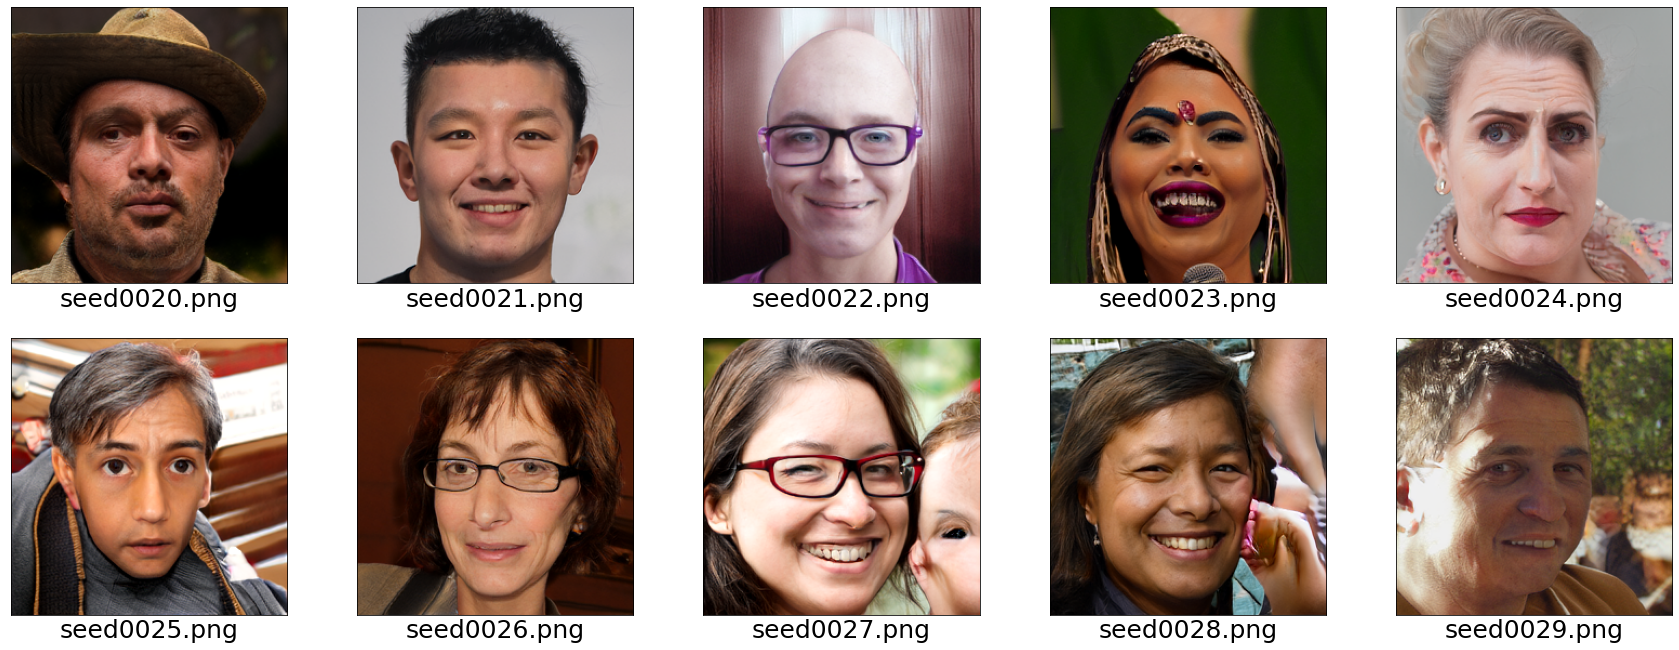

In [4]:
# 画像の表示
display_pic('out')

In [7]:
# 補完動画の作成
! python gen_video.py --output=lerp.mp4\
                      --trunc=1.0\
                      --seeds=20-49\
                      --grid=3x2 \
                      --network=pokemon.pkl

Loading networks from "pokemon.pkl"...
100% 600/600 [01:25<00:00,  7.01it/s]


In [8]:
# 動画の再生　メモリ足りない？？
display_mp4('lerp.mp4')

prepere to play movie...
